<a href="https://colab.research.google.com/github/Bonam24/UrlDataset_Work/blob/main/LogisticRegressionForURLDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
input_file = "/content/urlset.csv"
output_file = "/content/clean_urlset.csv"

with open(input_file, 'r', encoding='ISO-8859-1') as infile, open(output_file, 'w', encoding='ISO-8859-1') as outfile:
    header = infile.readline()
    outfile.write(header)
    num_columns = len(header.split(','))

    for line in infile:
        if len(line.split(',')) == num_columns:
            outfile.write(line)

# Read the cleaned CSV file
data = pd.read_csv(output_file, encoding='ISO-8859-1')


<ipython-input-2-7e00dc8d40a8>:14: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file, encoding='ISO-8859-1')


In [3]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95538,xbox360.ign.com/objects/850/850402.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95539,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95540,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95541,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [4]:
#check for samples of the data
data.sample(20)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
75309,www.angelfire.com/electronic/vikram/,2547,1,1,2.0,29.500000,29.000000,0.025316,0.025641,0.028169,0.028571,0.636364,0.746269,0.0
21645,creatureleggendarie.com/old_aol.1.3/?Login=&Li...,10000000,0,0,4.0,192.500000,200.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.854782,1.0
28868,kandycrew.com.au/us/webscr.php?cmd=_login-run,10000000,0,0,6.0,288.166667,297.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.816116,1.0
20871,'www.sesamii.com/images/?us.battle.net/login/e...,10000000,0,0,12.0,137.333333,135.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.751606,1.0
61607,sourceforge.net/projects/ep128emu/,168,1,1,1.0,51.000000,50.000000,0.028571,0.014286,0.015625,0.000000,0.666667,0.77193,0.0
29032,cafm.mn/french/wp-content/uploads/2012/09/fren...,10000000,1,0,14.0,70.000000,68.214286,0.004053,0.004158,0.004057,0.004162,0.909091,0.694396,1.0
48974,groups.yahoo.com/adultconf?dest=/group/amywarn...,4,1,1,7.0,85.571429,83.428571,0.015311,0.020488,0.015106,0.018462,0.711198,0.831269,0.0
15873,ttcssl.co.uk/identity.php?cmd=SignIn&co_partne...,10000000,0,0,14.0,78.642857,82.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.759938,1.0
75205,www.excelsior-usa.com/jet.html,522687,0,0,2.0,164.000000,163.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804408,0.0
90510,www.boardgamegeek.com/game/13,5060,1,0,1.0,951.000000,995.000000,0.006270,0.004990,0.001050,0.001004,0.166667,0.837583,0.0


In [5]:
#check the shape of the data
data.shape

(95543, 14)

In [6]:
#number of missing values in the data
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            2
dtype: int64

<Axes: >

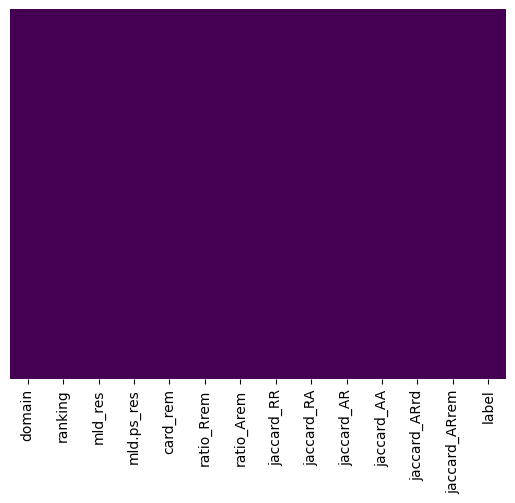

In [7]:
#draw the heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
#check the data description
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,9.554300e+04,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95543.000000,95541.000000
mean,5.894195e+06,0.455397,0.202432,4.576305,135.101269,138.380608,0.003989,0.003749,0.003346,0.003620,0.307762,0.499074
std,4.877419e+06,0.498009,0.403245,4.369335,161.012071,175.518063,0.028618,0.024368,0.023677,0.028127,0.363163,0.500002
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.571500e+04,0.000000,0.000000,2.000000,43.000000,39.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.000000,178.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000
max,1.000000e+07,1.000000,11.000000,151.909091,5507.000000,6097.000000,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000


<ipython-input-9-a8f23ac0ca8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='magma')


<Axes: xlabel='label', ylabel='count'>

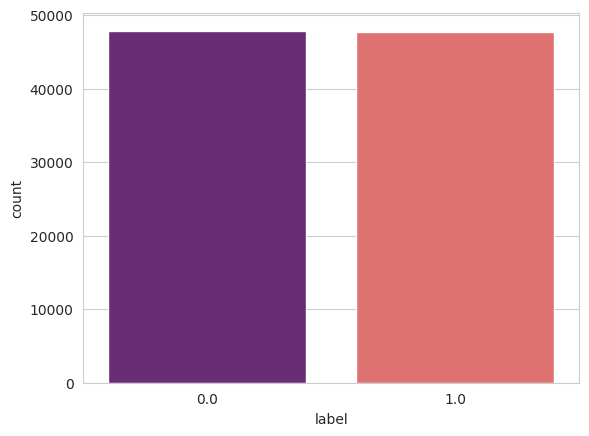

In [9]:
#check the distribution of phishing to legit websites
sns.set_style('whitegrid')
sns.countplot(x='label', data=data, palette='magma')

<Axes: xlabel='ranking', ylabel='count'>

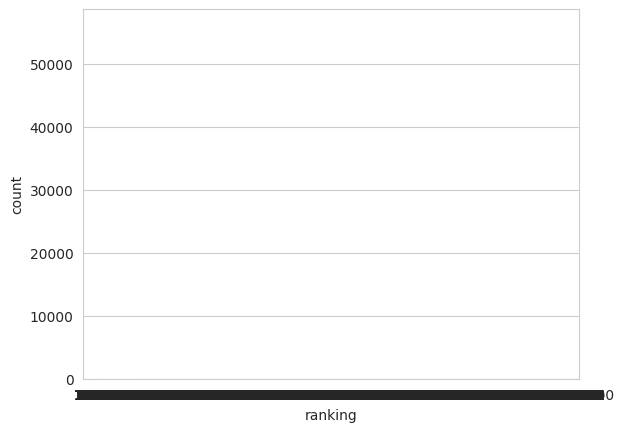

In [10]:
#Do countplot
sns.countplot(x='ranking', data=data)

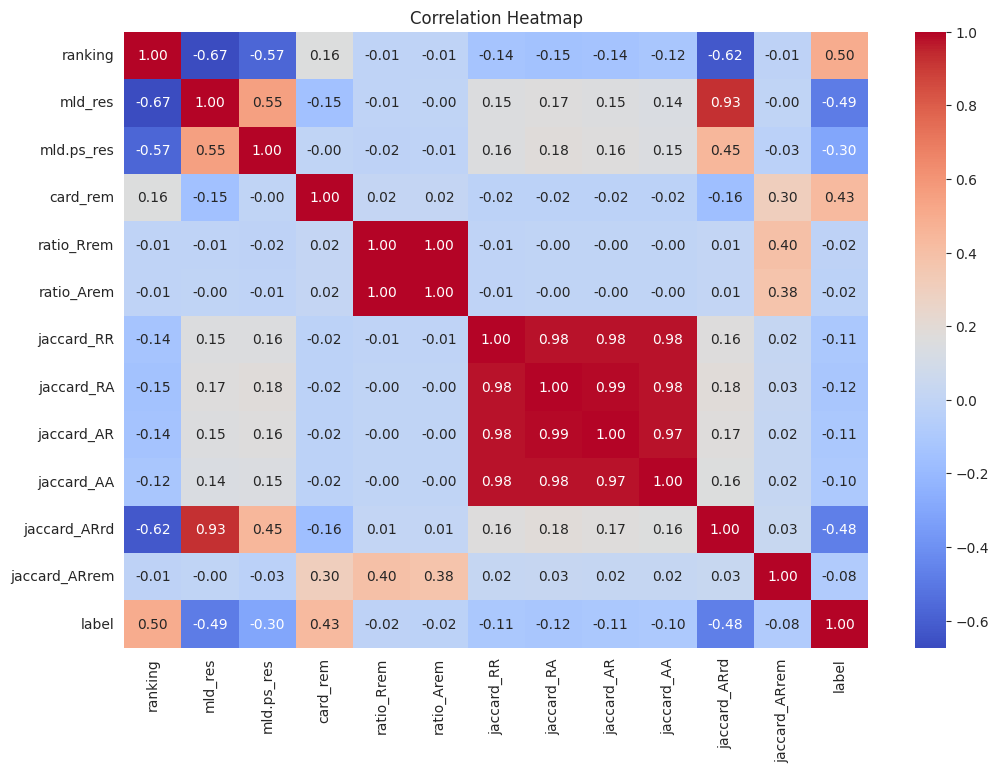

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only the numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

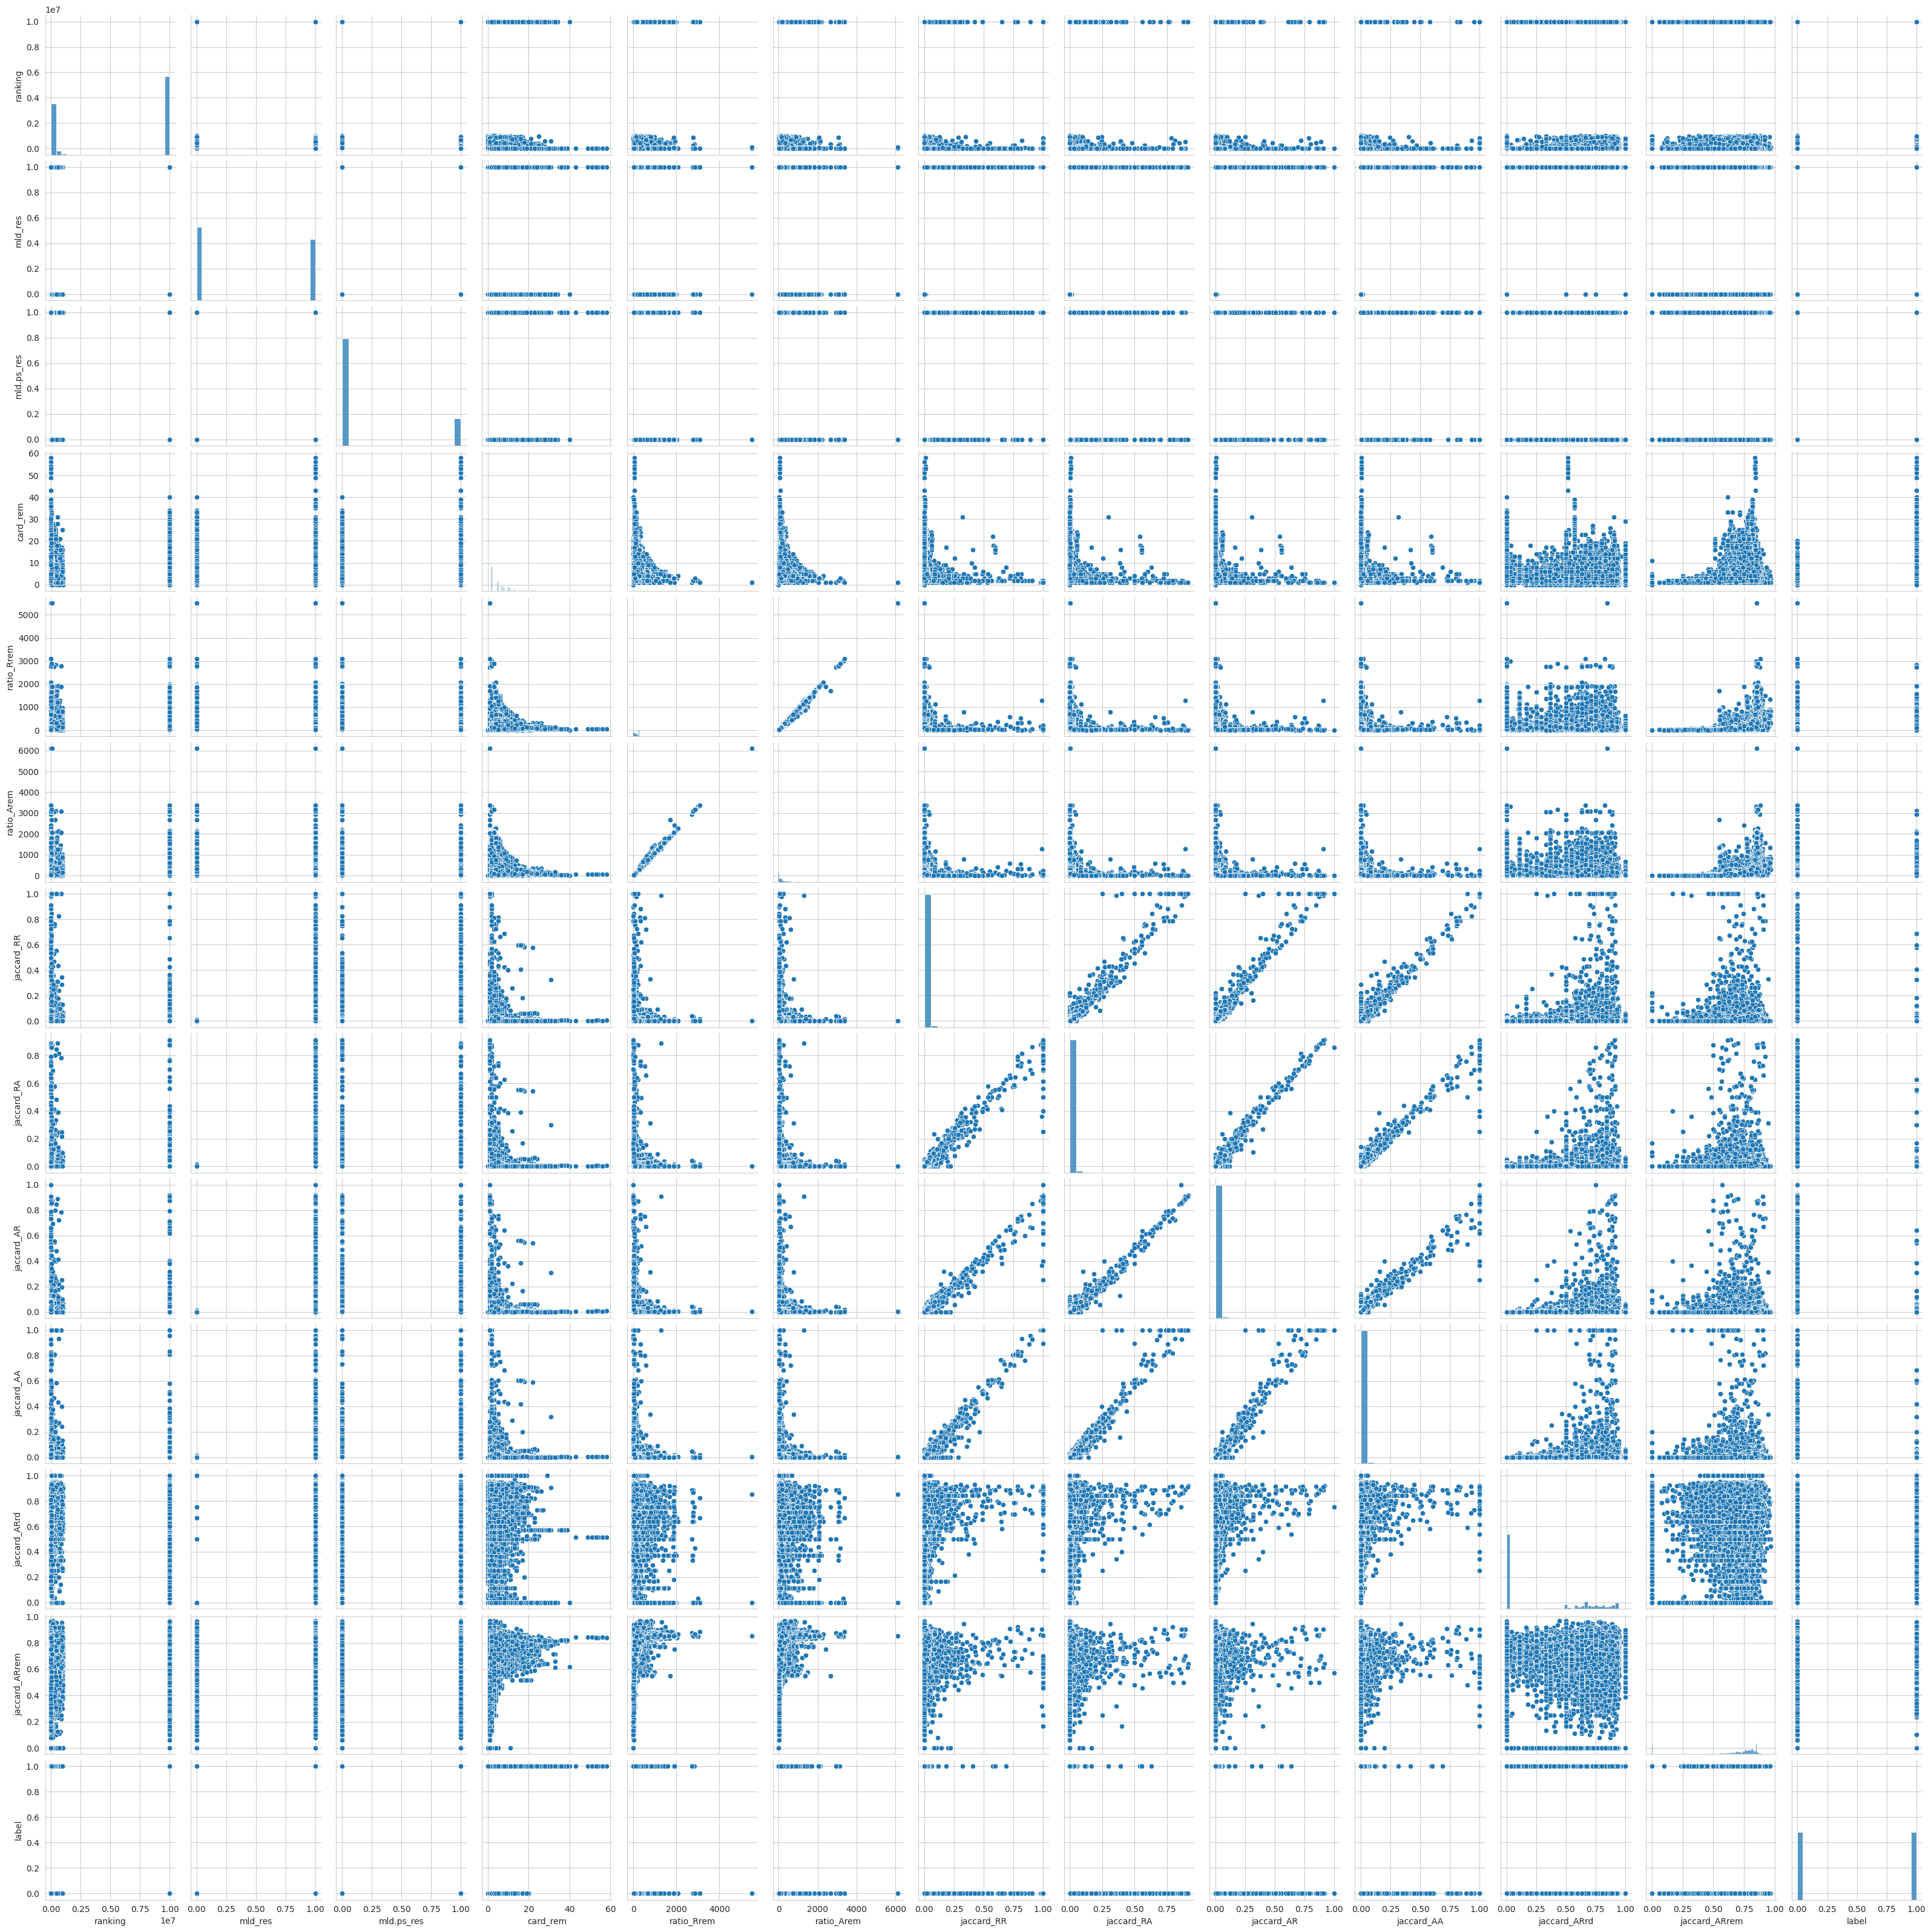

In [32]:
# Pair plots
# Select only numerical columns for pair plots after dropping 'Unnamed: 14'
numerical_data = data.select_dtypes(include=['number'])
sns.pairplot(numerical_data)
plt.show()

In [11]:
data.drop('domain',axis=1,inplace=True)

In [12]:
# Convert non-numeric columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Verify the data types again



In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test =train_test_split(data.drop('label',axis=1),data['label'], test_size=0.2, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()

In [17]:
logmodel

LogisticRegression()

In [18]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [19]:
X_train.shape

(76432, 12)

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss, confusion_matrix

In [23]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9603
         1.0       0.50      1.00      0.66      9506

    accuracy                           0.50     19109
   macro avg       0.25      0.50      0.33     19109
weighted avg       0.25      0.50      0.33     19109



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


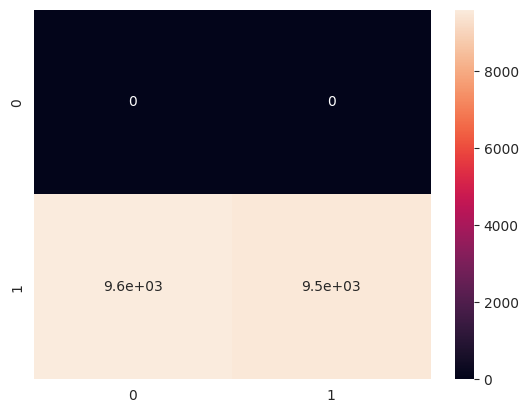

In [24]:
print(sns.heatmap(confusion_matrix(predictions, Y_test), annot=True))

In [25]:
pip install scikit-plot

In [26]:
import scikitplot as skplt

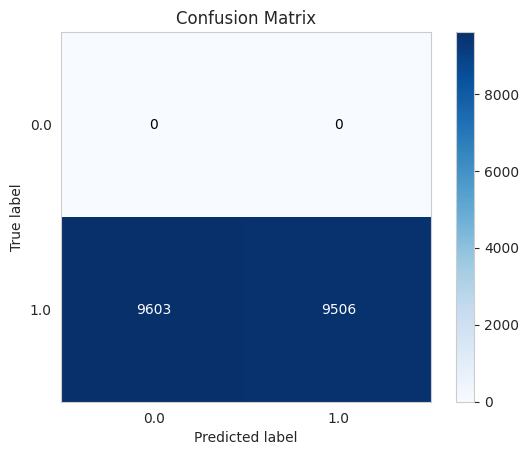

In [27]:
skplt.metrics.plot_confusion_matrix(predictions, Y_test)
plt.show()

In [29]:
predicted_probas = logmodel.predict_proba(X_test)

In [30]:
predicted_probas

array([[0.49697066, 0.50302934],
       [0.49173229, 0.50826771],
       [0.49999976, 0.50000024],
       ...,
       [0.49999987, 0.50000013],
       [0.29252597, 0.70747403],
       [0.49991539, 0.50008461]])

In [31]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49746192893401014
